In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#런타임 다시시작, 이 CELL 빼고 다시 실행

In [ ]:
plt.rc('font', family='NanumBarunGothic')

In [ ]:
d2018 = pd.read_csv('/content/drive/MyDrive/빅콘테스트/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2018.csv', encoding = 'cp949')
d2019 = pd.read_csv('/content/drive/MyDrive/빅콘테스트/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2019.csv', encoding = 'cp949')
d2020 = pd.read_csv('/content/drive/MyDrive/빅콘테스트/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2020.csv', encoding = 'cp949')
d2021 = pd.read_csv('/content/drive/MyDrive/빅콘테스트/01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2021.csv', encoding = 'cp949')

In [ ]:
df = pd.concat([d2018, d2019, d2020, d2021], ignore_index=True)
df

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PIT_VEL,STADIUM
0,2018,20180324HHWO0,180324_140436,62797,HH,1,131.50,42.7,플라이,149.59,고척
1,2018,20180324HHWO0,180324_140514,76753,HH,1,135.18,9.9,1루타,148.78,고척
2,2018,20180324HHWO0,180324_140647,71752,HH,1,152.41,2.1,1루타,148.59,고척
3,2018,20180324HHWO0,180324_140911,62700,HH,1,113.72,13.5,1루타,139.13,고척
4,2018,20180324HHWO0,180324_142050,68730,HH,2,54.11,16.4,번트안타,134.07,고척
...,...,...,...,...,...,...,...,...,...,...,...
120740,2021,20210711LTSS0,210711_195321,50458,SS,8,141.23,-4.9,땅볼아웃,137.76,대구
120741,2021,20210711LTSS0,210711_195424,62415,SS,8,101.09,31.8,1루타,138.51,대구
120742,2021,20210711LTSS0,210711_195627,75566,SS,8,146.84,33.4,홈런,134.10,대구
120743,2021,20210711LTSS0,210711_200047,69418,SS,8,146.12,23.9,홈런,139.96,대구


In [ ]:
df.rename(columns={'HIT_VEL' : '타구속도', 'HIT_ANG_VER': "발사각도", 'PIT_VEL': '투구구속'}, inplace=True)
df

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,타구속도,발사각도,HIT_RESULT,투구구속,STADIUM
0,2018,20180324HHWO0,180324_140436,62797,HH,1,131.50,42.7,플라이,149.59,고척
1,2018,20180324HHWO0,180324_140514,76753,HH,1,135.18,9.9,1루타,148.78,고척
2,2018,20180324HHWO0,180324_140647,71752,HH,1,152.41,2.1,1루타,148.59,고척
3,2018,20180324HHWO0,180324_140911,62700,HH,1,113.72,13.5,1루타,139.13,고척
4,2018,20180324HHWO0,180324_142050,68730,HH,2,54.11,16.4,번트안타,134.07,고척
...,...,...,...,...,...,...,...,...,...,...,...
120740,2021,20210711LTSS0,210711_195321,50458,SS,8,141.23,-4.9,땅볼아웃,137.76,대구
120741,2021,20210711LTSS0,210711_195424,62415,SS,8,101.09,31.8,1루타,138.51,대구
120742,2021,20210711LTSS0,210711_195627,75566,SS,8,146.84,33.4,홈런,134.10,대구
120743,2021,20210711LTSS0,210711_200047,69418,SS,8,146.12,23.9,홈런,139.96,대구


## 배럴타구의 정의

98마일 ~ 100마일 : 발사각 26~30도




In [ ]:
df['score'] = 0
df

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,타구속도,발사각도,HIT_RESULT,투구구속,STADIUM,score
0,2018,20180324HHWO0,180324_140436,62797,HH,1,131.50,42.7,플라이,149.59,고척,0
1,2018,20180324HHWO0,180324_140514,76753,HH,1,135.18,9.9,1루타,148.78,고척,0
2,2018,20180324HHWO0,180324_140647,71752,HH,1,152.41,2.1,1루타,148.59,고척,0
3,2018,20180324HHWO0,180324_140911,62700,HH,1,113.72,13.5,1루타,139.13,고척,0
4,2018,20180324HHWO0,180324_142050,68730,HH,2,54.11,16.4,번트안타,134.07,고척,0
...,...,...,...,...,...,...,...,...,...,...,...,...
120740,2021,20210711LTSS0,210711_195321,50458,SS,8,141.23,-4.9,땅볼아웃,137.76,대구,0
120741,2021,20210711LTSS0,210711_195424,62415,SS,8,101.09,31.8,1루타,138.51,대구,0
120742,2021,20210711LTSS0,210711_195627,75566,SS,8,146.84,33.4,홈런,134.10,대구,0
120743,2021,20210711LTSS0,210711_200047,69418,SS,8,146.12,23.9,홈런,139.96,대구,0


In [ ]:
for i in range(len(df)):
  if (df['HIT_RESULT'][i] == '1루타') | (df['HIT_RESULT'][i] == '번트안타') | (df['HIT_RESULT'][i] == '내야안타') :
    df['score'][i] = 1
  elif df['HIT_RESULT'][i] == '2루타':
    df['score'][i] = 2
  elif df['HIT_RESULT'][i] == '3루타':
    df['score'][i] = 3
  elif df['HIT_RESULT'][i] == '홈런':
    df['score'][i] = 4

df

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,타구속도,발사각도,HIT_RESULT,투구구속,STADIUM,score
0,2018,20180324HHWO0,180324_140436,62797,HH,1,131.50,42.7,플라이,149.59,고척,0
1,2018,20180324HHWO0,180324_140514,76753,HH,1,135.18,9.9,1루타,148.78,고척,1
2,2018,20180324HHWO0,180324_140647,71752,HH,1,152.41,2.1,1루타,148.59,고척,1
3,2018,20180324HHWO0,180324_140911,62700,HH,1,113.72,13.5,1루타,139.13,고척,1
4,2018,20180324HHWO0,180324_142050,68730,HH,2,54.11,16.4,번트안타,134.07,고척,1
...,...,...,...,...,...,...,...,...,...,...,...,...
120740,2021,20210711LTSS0,210711_195321,50458,SS,8,141.23,-4.9,땅볼아웃,137.76,대구,0
120741,2021,20210711LTSS0,210711_195424,62415,SS,8,101.09,31.8,1루타,138.51,대구,1
120742,2021,20210711LTSS0,210711_195627,75566,SS,8,146.84,33.4,홈런,134.10,대구,4
120743,2021,20210711LTSS0,210711_200047,69418,SS,8,146.12,23.9,홈런,139.96,대구,4


In [ ]:
df2 = df[['타구속도', '발사각도', 'HIT_RESULT', '투구구속', 'STADIUM', 'score']]
df2

,타구속도,발사각도,HIT_RESULT,투구구속,STADIUM,score
0,131.50,42.7,플라이,149.59,고척,0
1,135.18,9.9,1루타,148.78,고척,1
2,152.41,2.1,1루타,148.59,고척,1
3,113.72,13.5,1루타,139.13,고척,1
4,54.11,16.4,번트안타,134.07,고척,1
...,...,...,...,...,...,...
120740,141.23,-4.9,땅볼아웃,137.76,대구,0
120741,101.09,31.8,1루타,138.51,대구,1
120742,146.84,33.4,홈런,134.10,대구,4
120743,146.12,23.9,홈런,139.96,대구,4


In [ ]:
idx1 = df2[df2['HIT_RESULT'] =='희생플라이'].index
df2 = df2.drop(idx1)
df2

,타구속도,발사각도,HIT_RESULT,투구구속,STADIUM,score
0,131.50,42.7,플라이,149.59,고척,0
1,135.18,9.9,1루타,148.78,고척,1
2,152.41,2.1,1루타,148.59,고척,1
3,113.72,13.5,1루타,139.13,고척,1
4,54.11,16.4,번트안타,134.07,고척,1
...,...,...,...,...,...,...
120740,141.23,-4.9,땅볼아웃,137.76,대구,0
120741,101.09,31.8,1루타,138.51,대구,1
120742,146.84,33.4,홈런,134.10,대구,4
120743,146.12,23.9,홈런,139.96,대구,4


## 이상치 제거

구간 설정 이전에 이상치를 박스플롯으로 확인

이상치 값들을 직접 그날의 야구 중계 혹은 뉴스를 통해 입력 설정 오류값인지
실제 값인지 판단 필요

통계적인 이상치 기준을 따르기보다는, 직접 확인

+ Q1 = 1.5*IQR 값들에 대해서는 통계적인 이상치 기준을 적용 X

야구의 경우 번트, 특정 파울 타구는 매우 낮은 타구속도를 충분히 기록할 수 있으므로 이상치로 판단 X

### 이상치 제거 하기

경기영상을 통해 이상치 확인 결과, 19787행만 제거

In [ ]:
df2.drop([19787], inplace=True)

In [ ]:
df2 = df2.reset_index()
df2.drop(['index'], axis = 1)
df2

,index,타구속도,발사각도,HIT_RESULT,투구구속,STADIUM,score
0,0,131.50,42.7,플라이,149.59,고척,0
1,1,135.18,9.9,1루타,148.78,고척,1
2,2,152.41,2.1,1루타,148.59,고척,1
3,3,113.72,13.5,1루타,139.13,고척,1
4,4,54.11,16.4,번트안타,134.07,고척,1
...,...,...,...,...,...,...,...
119136,120740,141.23,-4.9,땅볼아웃,137.76,대구,0
119137,120741,101.09,31.8,1루타,138.51,대구,1
119138,120742,146.84,33.4,홈런,134.10,대구,4
119139,120743,146.12,23.9,홈런,139.96,대구,4


### 배럴타구 조건 정의

각도: 5도 ~ 65도까지 1도 단위 구간 분할 
타구속도 : 133에서 193까지 1도 단위 구간 분할

총 3600개의 구간 분할 후

-> 각 구간의 장타율 평균을 구하고,

평균이 높은 순으로 구간들을 선택해 이 비율이
전체 타구 개수 비율의 %가 되는 선으로 





In [ ]:
df2['타구속도_cut'] = pd.cut(df2.타구속도, bins=list(range(133,194)), )
df2

,index,타구속도,발사각도,HIT_RESULT,투구구속,STADIUM,score,타구속도_cut
0,0,131.50,42.7,플라이,149.59,고척,0,NaN
1,1,135.18,9.9,1루타,148.78,고척,1,"(135.0, 136.0]"
2,2,152.41,2.1,1루타,148.59,고척,1,"(152.0, 153.0]"
3,3,113.72,13.5,1루타,139.13,고척,1,NaN
4,4,54.11,16.4,번트안타,134.07,고척,1,NaN
...,...,...,...,...,...,...,...,...
119136,120740,141.23,-4.9,땅볼아웃,137.76,대구,0,"(141.0, 142.0]"
119137,120741,101.09,31.8,1루타,138.51,대구,1,NaN
119138,120742,146.84,33.4,홈런,134.10,대구,4,"(146.0, 147.0]"
119139,120743,146.12,23.9,홈런,139.96,대구,4,"(146.0, 147.0]"


In [ ]:
df2['발사각도_cut'] = pd.cut(df2.발사각도, bins=list(range(5,65)), )
df2

,index,타구속도,발사각도,HIT_RESULT,투구구속,STADIUM,score,타구속도_cut,발사각도_cut
0,0,131.50,42.7,플라이,149.59,고척,0,NaN,"(42.0, 43.0]"
1,1,135.18,9.9,1루타,148.78,고척,1,"(135.0, 136.0]","(9.0, 10.0]"
2,2,152.41,2.1,1루타,148.59,고척,1,"(152.0, 153.0]",NaN
3,3,113.72,13.5,1루타,139.13,고척,1,NaN,"(13.0, 14.0]"
4,4,54.11,16.4,번트안타,134.07,고척,1,NaN,"(16.0, 17.0]"
...,...,...,...,...,...,...,...,...,...
119136,120740,141.23,-4.9,땅볼아웃,137.76,대구,0,"(141.0, 142.0]",NaN
119137,120741,101.09,31.8,1루타,138.51,대구,1,NaN,"(31.0, 32.0]"
119138,120742,146.84,33.4,홈런,134.10,대구,4,"(146.0, 147.0]","(33.0, 34.0]"
119139,120743,146.12,23.9,홈런,139.96,대구,4,"(146.0, 147.0]","(23.0, 24.0]"


In [ ]:
df2 = df2.dropna()
df2

,index,타구속도,발사각도,HIT_RESULT,투구구속,STADIUM,score,타구속도_cut,발사각도_cut
1,1,135.18,9.9,1루타,148.78,고척,1,"(135, 136]","(9, 10]"
11,11,134.27,9.4,1루타,144.83,고척,1,"(134, 135]","(9, 10]"
12,12,155.49,21.0,1루타,144.87,고척,1,"(155, 156]","(20, 21]"
15,15,165.04,20.3,홈런,140.05,고척,4,"(165, 166]","(20, 21]"
16,16,142.52,11.6,1루타,148.67,고척,1,"(142, 143]","(11, 12]"
...,...,...,...,...,...,...,...,...,...
119130,120734,145.85,41.3,플라이,114.07,대구,0,"(145, 146]","(41, 42]"
119133,120737,139.48,26.9,홈런,134.80,대구,4,"(139, 140]","(26, 27]"
119138,120742,146.84,33.4,홈런,134.10,대구,4,"(146, 147]","(33, 34]"
119139,120743,146.12,23.9,홈런,139.96,대구,4,"(146, 147]","(23, 24]"


In [ ]:
df2 = df2.sort_values(by='타구속도_cut' ,ascending=True, ignore_index=True)
df2

,index,타구속도,발사각도,HIT_RESULT,투구구속,STADIUM,score,타구속도_cut,발사각도_cut
0,5333,133.18,26.0,2루타,104.64,대구,2,"(133, 134]","(25, 26]"
1,63774,133.38,8.8,직선타,144.24,광주,0,"(133, 134]","(8, 9]"
2,63766,133.56,37.9,플라이,142.89,광주,0,"(133, 134]","(37, 38]"
3,106450,133.93,34.6,플라이,143.32,대구,0,"(133, 134]","(34, 35]"
4,21314,133.17,19.9,1루타,149.82,잠실,1,"(133, 134]","(19, 20]"
...,...,...,...,...,...,...,...,...,...
42740,17208,178.17,21.0,홈런,149.75,잠실,4,"(178, 179]","(20, 21]"
42741,24317,178.54,14.0,플라이,144.27,대전,0,"(178, 179]","(13, 14]"
42742,47324,179.02,24.9,홈런,145.61,창원,4,"(179, 180]","(24, 25]"
42743,5553,179.25,17.4,2루타,143.41,잠실,2,"(179, 180]","(17, 18]"


In [ ]:
df2["타구속도_cut"] = df2["타구속도_cut"].astype(str)
df2["발사각도_cut"] = df2["발사각도_cut"].astype(str)
df2

,index,타구속도,발사각도,HIT_RESULT,투구구속,STADIUM,score,타구속도_cut,발사각도_cut
0,5333,133.18,26.0,2루타,104.64,대구,2,"(133, 134]","(25, 26]"
1,63774,133.38,8.8,직선타,144.24,광주,0,"(133, 134]","(8, 9]"
2,63766,133.56,37.9,플라이,142.89,광주,0,"(133, 134]","(37, 38]"
3,106450,133.93,34.6,플라이,143.32,대구,0,"(133, 134]","(34, 35]"
4,21314,133.17,19.9,1루타,149.82,잠실,1,"(133, 134]","(19, 20]"
...,...,...,...,...,...,...,...,...,...
42740,17208,178.17,21.0,홈런,149.75,잠실,4,"(178, 179]","(20, 21]"
42741,24317,178.54,14.0,플라이,144.27,대전,0,"(178, 179]","(13, 14]"
42742,47324,179.02,24.9,홈런,145.61,창원,4,"(179, 180]","(24, 25]"
42743,5553,179.25,17.4,2루타,143.41,잠실,2,"(179, 180]","(17, 18]"


In [ ]:
df2['발사각도_cut2'] = 0
df2['타구속도_cut2'] = 0

In [ ]:
for i in range(len(df2)):
  if ("," in df2['발사각도_cut'][i][1:3]):
    df2['발사각도_cut2'][i] = int(df2['발사각도_cut'][i][1:2])
    df2['타구속도_cut2'][i] = int(df2['타구속도_cut'][i][1:4])
  else :
    df2['발사각도_cut2'][i] = int(df2['발사각도_cut'][i][1:3])
    df2['타구속도_cut2'][i] = int(df2['타구속도_cut'][i][1:4])

df2

,index,타구속도,발사각도,HIT_RESULT,투구구속,STADIUM,score,타구속도_cut,발사각도_cut,발사각도_cut2,타구속도_cut2
0,5333,133.18,26.0,2루타,104.64,대구,2,"(133, 134]","(25, 26]",25,133
1,63774,133.38,8.8,직선타,144.24,광주,0,"(133, 134]","(8, 9]",8,133
2,63766,133.56,37.9,플라이,142.89,광주,0,"(133, 134]","(37, 38]",37,133
3,106450,133.93,34.6,플라이,143.32,대구,0,"(133, 134]","(34, 35]",34,133
4,21314,133.17,19.9,1루타,149.82,잠실,1,"(133, 134]","(19, 20]",19,133
...,...,...,...,...,...,...,...,...,...,...,...
42740,17208,178.17,21.0,홈런,149.75,잠실,4,"(178, 179]","(20, 21]",20,178
42741,24317,178.54,14.0,플라이,144.27,대전,0,"(178, 179]","(13, 14]",13,178
42742,47324,179.02,24.9,홈런,145.61,창원,4,"(179, 180]","(24, 25]",24,179
42743,5553,179.25,17.4,2루타,143.41,잠실,2,"(179, 180]","(17, 18]",17,179


In [ ]:
df2.groupby(['발사각도_cut2', '타구속도_cut2']).mean().score

발사각도_cut2  타구속도_cut2
5          133          0.558824
           134          0.500000
           135          0.612903
           136          0.780488
           137          0.565217
                          ...   
63         151          0.000000
           152          0.000000
           153          0.000000
           154          0.000000
           155          0.000000
Name: score, Length: 2067, dtype: float64

In [ ]:
score = pd.DataFrame(df2.groupby(['발사각도_cut2', '타구속도_cut2']).mean().score)
score

score
발사각도_cut2 타구속도_cut2          
5         133        0.558824
          134        0.500000
          135        0.612903
          136        0.780488
          137        0.565217
...                       ...
63        151        0.000000
          152        0.000000
          153        0.000000
          154        0.000000
          155        0.000000

[2067 rows x 1 columns]

In [ ]:
df2['장타율'] = 0.0
df2

,index,타구속도,발사각도,HIT_RESULT,투구구속,STADIUM,score,타구속도_cut,발사각도_cut,발사각도_cut2,타구속도_cut2,장타율
0,5333,133.18,26.0,2루타,104.64,대구,2,"(133, 134]","(25, 26]",25,133,0.0
1,63774,133.38,8.8,직선타,144.24,광주,0,"(133, 134]","(8, 9]",8,133,0.0
2,63766,133.56,37.9,플라이,142.89,광주,0,"(133, 134]","(37, 38]",37,133,0.0
3,106450,133.93,34.6,플라이,143.32,대구,0,"(133, 134]","(34, 35]",34,133,0.0
4,21314,133.17,19.9,1루타,149.82,잠실,1,"(133, 134]","(19, 20]",19,133,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
42740,17208,178.17,21.0,홈런,149.75,잠실,4,"(178, 179]","(20, 21]",20,178,0.0
42741,24317,178.54,14.0,플라이,144.27,대전,0,"(178, 179]","(13, 14]",13,178,0.0
42742,47324,179.02,24.9,홈런,145.61,창원,4,"(179, 180]","(24, 25]",24,179,0.0
42743,5553,179.25,17.4,2루타,143.41,잠실,2,"(179, 180]","(17, 18]",17,179,0.0


In [ ]:
score

score
발사각도_cut2 타구속도_cut2          
5         133        0.558824
          134        0.500000
          135        0.612903
          136        0.780488
          137        0.565217
...                       ...
63        151        0.000000
          152        0.000000
          153        0.000000
          154        0.000000
          155        0.000000

[2067 rows x 1 columns]

In [ ]:
for i in range (len(df2)):
  x = df2['발사각도_cut2'][i]
  y = df2['타구속도_cut2'][i]
  df2['장타율'][i] = score.loc[x].loc[y]

df2

,index,타구속도,발사각도,HIT_RESULT,투구구속,STADIUM,score,타구속도_cut,발사각도_cut,발사각도_cut2,타구속도_cut2,장타율
0,5333,133.18,26.0,2루타,104.64,대구,2,"(133, 134]","(25, 26]",25,133,0.150000
1,63774,133.38,8.8,직선타,144.24,광주,0,"(133, 134]","(8, 9]",8,133,0.871795
2,63766,133.56,37.9,플라이,142.89,광주,0,"(133, 134]","(37, 38]",37,133,0.000000
3,106450,133.93,34.6,플라이,143.32,대구,0,"(133, 134]","(34, 35]",34,133,0.076923
4,21314,133.17,19.9,1루타,149.82,잠실,1,"(133, 134]","(19, 20]",19,133,0.457143
...,...,...,...,...,...,...,...,...,...,...,...,...
42740,17208,178.17,21.0,홈런,149.75,잠실,4,"(178, 179]","(20, 21]",20,178,4.000000
42741,24317,178.54,14.0,플라이,144.27,대전,0,"(178, 179]","(13, 14]",13,178,0.000000
42742,47324,179.02,24.9,홈런,145.61,창원,4,"(179, 180]","(24, 25]",24,179,4.000000
42743,5553,179.25,17.4,2루타,143.41,잠실,2,"(179, 180]","(17, 18]",17,179,2.000000


In [ ]:
df2.to_csv('/content/drive/MyDrive/빅콘테스트/barrel_02.csv')

In [ ]:
score

score
발사각도_cut2 타구속도_cut2          
5         133        0.558824
          134        0.500000
          135        0.612903
          136        0.780488
          137        0.565217
...                       ...
63        151        0.000000
          152        0.000000
          153        0.000000
          154        0.000000
          155        0.000000

[2067 rows x 1 columns]

In [ ]:
pd.DataFrame(df2.groupby(['발사각도_cut2', '타구속도_cut2']).count())

index  타구속도  발사각도  ...  타구속도_cut  발사각도_cut  장타율
발사각도_cut2 타구속도_cut2                     ...                         
5         133           34    34    34  ...        34        34   34
          134           28    28    28  ...        28        28   28
          135           31    31    31  ...        31        31   31
          136           41    41    41  ...        41        41   41
          137           46    46    46  ...        46        46   46
...                    ...   ...   ...  ...       ...       ...  ...
63        151            1     1     1  ...         1         1    1
          152            1     1     1  ...         1         1    1
          153            1     1     1  ...         1         1    1
          154            1     1     1  ...         1         1    1
          155            3     3     3  ...         3         3    3

[2067 rows x 10 columns]

In [ ]:
ratio = pd.DataFrame(df2.groupby(['발사각도_cut2', '타구속도_cut2']).count().score)
#발사각도, 타구속도별 비율 확인
ratio

score
발사각도_cut2 타구속도_cut2       
5         133           34
          134           28
          135           31
          136           41
          137           46
...                    ...
63        151            1
          152            1
          153            1
          154            1
          155            3

[2067 rows x 1 columns]

In [ ]:
ratio = ratio.rename(columns = {'score' : 'count'})
ratio

count
발사각도_cut2 타구속도_cut2       
5         133           34
          134           28
          135           31
          136           41
          137           46
...                    ...
63        151            1
          152            1
          153            1
          154            1
          155            3

[2067 rows x 1 columns]

In [ ]:
ratio['score'] = score['score']
ratio

count     score
발사각도_cut2 타구속도_cut2                 
5         133           34  0.558824
          134           28  0.500000
          135           31  0.612903
          136           41  0.780488
          137           46  0.565217
...                    ...       ...
63        151            1  0.000000
          152            1  0.000000
          153            1  0.000000
          154            1  0.000000
          155            3  0.000000

[2067 rows x 2 columns]

In [ ]:
df2['hit_count'] = 0

for i in range(len(df2)):
  if (df2['HIT_RESULT'][i] == '1루타') | (df2['HIT_RESULT'][i] == '번트안타') | (df2['HIT_RESULT'][i] == '내야안타')  | (df2['HIT_RESULT'][i] == '2루타') | (df2['HIT_RESULT'][i] == '3루타') | (df2['HIT_RESULT'][i] == '홈런'):
    df2['hit_count'][i] = 1

df2

,index,타구속도,발사각도,HIT_RESULT,투구구속,STADIUM,score,타구속도_cut,발사각도_cut,발사각도_cut2,타구속도_cut2,장타율,hit_count
0,5333,133.18,26.0,2루타,104.64,대구,2,"(133, 134]","(25, 26]",25,133,0.150000,1
1,63774,133.38,8.8,직선타,144.24,광주,0,"(133, 134]","(8, 9]",8,133,0.871795,0
2,63766,133.56,37.9,플라이,142.89,광주,0,"(133, 134]","(37, 38]",37,133,0.000000,0
3,106450,133.93,34.6,플라이,143.32,대구,0,"(133, 134]","(34, 35]",34,133,0.076923,0
4,21314,133.17,19.9,1루타,149.82,잠실,1,"(133, 134]","(19, 20]",19,133,0.457143,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42740,17208,178.17,21.0,홈런,149.75,잠실,4,"(178, 179]","(20, 21]",20,178,4.000000,1
42741,24317,178.54,14.0,플라이,144.27,대전,0,"(178, 179]","(13, 14]",13,178,0.000000,0
42742,47324,179.02,24.9,홈런,145.61,창원,4,"(179, 180]","(24, 25]",24,179,4.000000,1
42743,5553,179.25,17.4,2루타,143.41,잠실,2,"(179, 180]","(17, 18]",17,179,2.000000,1


In [ ]:
score2 = pd.DataFrame(df2.groupby(['발사각도_cut2', '타구속도_cut2']).sum().hit_count)
score2

hit_count
발사각도_cut2 타구속도_cut2           
5         133               18
          134               14
          135               16
          136               29
          137               26
...                        ...
63        151                0
          152                0
          153                0
          154                0
          155                0

[2067 rows x 1 columns]

In [ ]:
ratio['hit_count'] = score2['hit_count']
ratio

count     score  hit_count
발사각도_cut2 타구속도_cut2                            
5         133           34  0.558824         18
          134           28  0.500000         14
          135           31  0.612903         16
          136           41  0.780488         29
          137           46  0.565217         26
...                    ...       ...        ...
63        151            1  0.000000          0
          152            1  0.000000          0
          153            1  0.000000          0
          154            1  0.000000          0
          155            3  0.000000          0

[2067 rows x 3 columns]

In [ ]:
ratio['타율'] = ratio['hit_count']/ratio['count']
ratio

count     score  hit_count        타율
발사각도_cut2 타구속도_cut2                                      
5         133           34  0.558824         18  0.529412
          134           28  0.500000         14  0.500000
          135           31  0.612903         16  0.516129
          136           41  0.780488         29  0.707317
          137           46  0.565217         26  0.565217
...                    ...       ...        ...       ...
63        151            1  0.000000          0  0.000000
          152            1  0.000000          0  0.000000
          153            1  0.000000          0  0.000000
          154            1  0.000000          0  0.000000
          155            3  0.000000          0  0.000000

[2067 rows x 4 columns]

In [ ]:
ratio['ratio'] = 0.0

for i in range(len(ratio)):
  ratio['ratio'] = ratio['count']/len(df)

ratio

count     score  hit_count        타율     ratio
발사각도_cut2 타구속도_cut2                                                
5         133           34  0.558824         18  0.529412  0.000282
          134           28  0.500000         14  0.500000  0.000232
          135           31  0.612903         16  0.516129  0.000257
          136           41  0.780488         29  0.707317  0.000340
          137           46  0.565217         26  0.565217  0.000381
...                    ...       ...        ...       ...       ...
63        151            1  0.000000          0  0.000000  0.000008
          152            1  0.000000          0  0.000000  0.000008
          153            1  0.000000          0  0.000000  0.000008
          154            1  0.000000          0  0.000000  0.000008
          155            3  0.000000          0  0.000000  0.000025

[2067 rows x 5 columns]

In [ ]:
ratio['index'] = ratio.index
ratio

count     score  hit_count        타율     ratio      index
발사각도_cut2 타구속도_cut2                                                           
5         133           34  0.558824         18  0.529412  0.000282   (5, 133)
          134           28  0.500000         14  0.500000  0.000232   (5, 134)
          135           31  0.612903         16  0.516129  0.000257   (5, 135)
          136           41  0.780488         29  0.707317  0.000340   (5, 136)
          137           46  0.565217         26  0.565217  0.000381   (5, 137)
...                    ...       ...        ...       ...       ...        ...
63        151            1  0.000000          0  0.000000  0.000008  (63, 151)
          152            1  0.000000          0  0.000000  0.000008  (63, 152)
          153            1  0.000000          0  0.000000  0.000008  (63, 153)
          154            1  0.000000          0  0.000000  0.000008  (63, 154)
          155            3  0.000000          0  0.000000  0.000025  (63, 155)

[2067 rows x 6 columns]

In [ ]:
ratio['index_num'] = 0

for i in range(len(ratio)):
  ratio['index_num'][i] = i

ratio

count     score  hit_count  ...     ratio      index index_num
발사각도_cut2 타구속도_cut2                              ...                               
5         133           34  0.558824         18  ...  0.000282   (5, 133)         0
          134           28  0.500000         14  ...  0.000232   (5, 134)         1
          135           31  0.612903         16  ...  0.000257   (5, 135)         2
          136           41  0.780488         29  ...  0.000340   (5, 136)         3
          137           46  0.565217         26  ...  0.000381   (5, 137)         4
...                    ...       ...        ...  ...       ...        ...       ...
63        151            1  0.000000          0  ...  0.000008  (63, 151)      2062
          152            1  0.000000          0  ...  0.000008  (63, 152)      2063
          153            1  0.000000          0  ...  0.000008  (63, 153)      2064
          154            1  0.000000          0  ...  0.000008  (63, 154)      2065
          155            3  0.000000          0  ...  0.000025  (63, 155)      2066

[2067 rows x 7 columns]

In [ ]:
ratio

count     score  hit_count  ...     ratio      index index_num
발사각도_cut2 타구속도_cut2                              ...                               
5         133           34  0.558824         18  ...  0.000282   (5, 133)         0
          134           28  0.500000         14  ...  0.000232   (5, 134)         1
          135           31  0.612903         16  ...  0.000257   (5, 135)         2
          136           41  0.780488         29  ...  0.000340   (5, 136)         3
          137           46  0.565217         26  ...  0.000381   (5, 137)         4
...                    ...       ...        ...  ...       ...        ...       ...
63        151            1  0.000000          0  ...  0.000008  (63, 151)      2062
          152            1  0.000000          0  ...  0.000008  (63, 152)      2063
          153            1  0.000000          0  ...  0.000008  (63, 153)      2064
          154            1  0.000000          0  ...  0.000008  (63, 154)      2065
          155            3  0.000000          0  ...  0.000025  (63, 155)      2066

[2067 rows x 7 columns]

In [ ]:
ratio = ratio.reset_index()
ratio

,발사각도_cut2,타구속도_cut2,count,score,hit_count,타율,ratio,index,index_num
0,5,133,34,0.558824,18,0.529412,0.000282,"(5, 133)",0
1,5,134,28,0.500000,14,0.500000,0.000232,"(5, 134)",1
2,5,135,31,0.612903,16,0.516129,0.000257,"(5, 135)",2
3,5,136,41,0.780488,29,0.707317,0.000340,"(5, 136)",3
4,5,137,46,0.565217,26,0.565217,0.000381,"(5, 137)",4
...,...,...,...,...,...,...,...,...,...
2062,63,151,1,0.000000,0,0.000000,0.000008,"(63, 151)",2062
2063,63,152,1,0.000000,0,0.000000,0.000008,"(63, 152)",2063
2064,63,153,1,0.000000,0,0.000000,0.000008,"(63, 153)",2064
2065,63,154,1,0.000000,0,0.000000,0.000008,"(63, 154)",2065


# 바로 여기!!!!!!!!

In [ ]:
ratio['배럴타구'] = 0

for i in range(len(ratio)):
  if (ratio['score'][i] >= 1.550) & (ratio['타율'][i] >= 0.600):
      ratio['배럴타구'][i] = 1

ratio

,발사각도_cut2,타구속도_cut2,count,score,hit_count,타율,ratio,index,index_num,배럴타구
0,5,133,34,0.558824,18,0.529412,0.000282,"(5, 133)",0,0
1,5,134,28,0.500000,14,0.500000,0.000232,"(5, 134)",1,0
2,5,135,31,0.612903,16,0.516129,0.000257,"(5, 135)",2,0
3,5,136,41,0.780488,29,0.707317,0.000340,"(5, 136)",3,0
4,5,137,46,0.565217,26,0.565217,0.000381,"(5, 137)",4,0
...,...,...,...,...,...,...,...,...,...,...
2062,63,151,1,0.000000,0,0.000000,0.000008,"(63, 151)",2062,0
2063,63,152,1,0.000000,0,0.000000,0.000008,"(63, 152)",2063,0
2064,63,153,1,0.000000,0,0.000000,0.000008,"(63, 153)",2064,0
2065,63,154,1,0.000000,0,0.000000,0.000008,"(63, 154)",2065,0


In [ ]:
ratio[ratio['배럴타구'] == 1]

,발사각도_cut2,타구속도_cut2,count,score,hit_count,타율,ratio,index,index_num,배럴타구
80,6,171,3,2.000000,3,1.000000,0.000025,"(6, 171)",80,1
120,7,170,1,2.000000,1,1.000000,0.000008,"(7, 170)",120,1
162,8,170,7,1.571429,7,1.000000,0.000058,"(8, 170)",162,1
206,9,173,1,2.000000,1,1.000000,0.000008,"(9, 173)",206,1
208,9,177,1,2.000000,1,1.000000,0.000008,"(9, 177)",208,1
...,...,...,...,...,...,...,...,...,...,...
1626,46,165,1,4.000000,1,1.000000,0.000008,"(46, 165)",1626,1
1627,46,166,1,4.000000,1,1.000000,0.000008,"(46, 166)",1627,1
1656,47,161,3,2.000000,2,0.666667,0.000025,"(47, 161)",1656,1
1713,49,162,1,4.000000,1,1.000000,0.000008,"(49, 162)",1713,1


In [ ]:
ratio2 = ratio.sort_values(by='배럴타구' ,ascending=False, ignore_index=True)
ratio2

,발사각도_cut2,타구속도_cut2,count,score,hit_count,타율,ratio,index,index_num,배럴타구
0,19,162,17,2.764706,16,0.941176,0.000141,"(19, 162)",611,1
1,25,157,18,3.055556,15,0.833333,0.000149,"(25, 157)",851,1
2,24,169,2,4.000000,2,1.000000,0.000017,"(24, 169)",822,1
3,24,170,3,4.000000,3,1.000000,0.000025,"(24, 170)",823,1
4,24,171,3,4.000000,3,1.000000,0.000025,"(24, 171)",824,1
...,...,...,...,...,...,...,...,...,...,...
2062,20,135,27,0.333333,5,0.185185,0.000224,"(20, 135)",624,0
2063,20,134,35,0.314286,6,0.171429,0.000290,"(20, 134)",623,0
2064,20,133,29,0.517241,10,0.344828,0.000240,"(20, 133)",622,0
2065,19,158,30,1.433333,20,0.666667,0.000248,"(19, 158)",607,0


In [ ]:
#비율 누적
ratio2['ratio_accum'] = 0.0
ratio2['ratio_accum'][0] = ratio2['ratio'][0]

for i in range(len(ratio2)-1):
  ratio2['ratio_accum'][i+1] = ratio2['ratio_accum'][i] + ratio2['ratio'][i+1]

ratio2

,발사각도_cut2,타구속도_cut2,count,score,hit_count,타율,ratio,index,index_num,배럴타구,ratio_accum
0,19,162,17,2.764706,16,0.941176,0.000141,"(19, 162)",611,1,0.000141
1,25,157,18,3.055556,15,0.833333,0.000149,"(25, 157)",851,1,0.000290
2,24,169,2,4.000000,2,1.000000,0.000017,"(24, 169)",822,1,0.000306
3,24,170,3,4.000000,3,1.000000,0.000025,"(24, 170)",823,1,0.000331
4,24,171,3,4.000000,3,1.000000,0.000025,"(24, 171)",824,1,0.000356
...,...,...,...,...,...,...,...,...,...,...,...
2062,20,135,27,0.333333,5,0.185185,0.000224,"(20, 135)",624,0,0.353207
2063,20,134,35,0.314286,6,0.171429,0.000290,"(20, 134)",623,0,0.353497
2064,20,133,29,0.517241,10,0.344828,0.000240,"(20, 133)",622,0,0.353737
2065,19,158,30,1.433333,20,0.666667,0.000248,"(19, 158)",607,0,0.353986


In [ ]:
ratio2.to_csv('/content/drive/MyDrive/빅콘테스트/ratio_accumulative.csv')

In [ ]:
ratio2[ratio2['ratio_accum']< 0.075]

,발사각도_cut2,타구속도_cut2,count,score,hit_count,타율,ratio,index,index_num,배럴타구,ratio_accum
0,19,162,17,2.764706,16,0.941176,0.000141,"(19, 162)",611,1,0.000141
1,25,157,18,3.055556,15,0.833333,0.000149,"(25, 157)",851,1,0.000290
2,24,169,2,4.000000,2,1.000000,0.000017,"(24, 169)",822,1,0.000306
3,24,170,3,4.000000,3,1.000000,0.000025,"(24, 170)",823,1,0.000331
4,24,171,3,4.000000,3,1.000000,0.000025,"(24, 171)",824,1,0.000356
...,...,...,...,...,...,...,...,...,...,...,...
652,38,144,23,0.695652,4,0.173913,0.000190,"(38, 144)",1335,0,0.074165
653,38,145,27,0.592593,4,0.148148,0.000224,"(38, 145)",1336,0,0.074388
654,41,139,25,0.000000,0,0.000000,0.000207,"(41, 139)",1436,0,0.074595
655,41,140,16,0.000000,0,0.000000,0.000133,"(41, 140)",1437,0,0.074728


In [ ]:
ratio2['count'] = 0

for i in range(len(ratio2)):
  if ratio2['ratio_accum'][i]< 0.074:
    ratio2['count'][i] = 1

ratio2

,발사각도_cut2,타구속도_cut2,count,score,hit_count,타율,ratio,index,index_num,배럴타구,ratio_accum
0,19,162,1,2.764706,16,0.941176,0.000141,"(19, 162)",611,1,0.000141
1,25,157,1,3.055556,15,0.833333,0.000149,"(25, 157)",851,1,0.000290
2,24,169,1,4.000000,2,1.000000,0.000017,"(24, 169)",822,1,0.000306
3,24,170,1,4.000000,3,1.000000,0.000025,"(24, 170)",823,1,0.000331
4,24,171,1,4.000000,3,1.000000,0.000025,"(24, 171)",824,1,0.000356
...,...,...,...,...,...,...,...,...,...,...,...
2062,20,135,0,0.333333,5,0.185185,0.000224,"(20, 135)",624,0,0.353207
2063,20,134,0,0.314286,6,0.171429,0.000290,"(20, 134)",623,0,0.353497
2064,20,133,0,0.517241,10,0.344828,0.000240,"(20, 133)",622,0,0.353737
2065,19,158,0,1.433333,20,0.666667,0.000248,"(19, 158)",607,0,0.353986


In [ ]:
ratio2.loc[1]['index']

(25, 157)

In [ ]:
ratio2[ratio2['index'] == (8, 148)]

,발사각도_cut2,타구속도_cut2,count,score,hit_count,타율,ratio,index,index_num,배럴타구,ratio_accum
1639,8,148,0,1.014286,59,0.842857,0.00058,"(8, 148)",140,0,0.229947


In [ ]:
ratio2[ratio2['index'] == (8, 148)]['count']

1639    0
Name: count, dtype: int64

In [ ]:
df2['배럴타구'] = 0
df2

,index,타구속도,발사각도,HIT_RESULT,투구구속,STADIUM,score,타구속도_cut,발사각도_cut,발사각도_cut2,타구속도_cut2,장타율,hit_count,배럴타구
0,5333,133.18,26.0,2루타,104.64,대구,2,"(133, 134]","(25, 26]",25,133,0.150000,1,0
1,63774,133.38,8.8,직선타,144.24,광주,0,"(133, 134]","(8, 9]",8,133,0.871795,0,0
2,63766,133.56,37.9,플라이,142.89,광주,0,"(133, 134]","(37, 38]",37,133,0.000000,0,0
3,106450,133.93,34.6,플라이,143.32,대구,0,"(133, 134]","(34, 35]",34,133,0.076923,0,0
4,21314,133.17,19.9,1루타,149.82,잠실,1,"(133, 134]","(19, 20]",19,133,0.457143,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42740,17208,178.17,21.0,홈런,149.75,잠실,4,"(178, 179]","(20, 21]",20,178,4.000000,1,0
42741,24317,178.54,14.0,플라이,144.27,대전,0,"(178, 179]","(13, 14]",13,178,0.000000,0,0
42742,47324,179.02,24.9,홈런,145.61,창원,4,"(179, 180]","(24, 25]",24,179,4.000000,1,0
42743,5553,179.25,17.4,2루타,143.41,잠실,2,"(179, 180]","(17, 18]",17,179,2.000000,1,0


In [ ]:
ratio

,발사각도_cut2,타구속도_cut2,count,score,hit_count,타율,ratio,index,index_num,배럴타구
0,5,133,34,0.558824,18,0.529412,0.000282,"(5, 133)",0,0
1,5,134,28,0.500000,14,0.500000,0.000232,"(5, 134)",1,0
2,5,135,31,0.612903,16,0.516129,0.000257,"(5, 135)",2,0
3,5,136,41,0.780488,29,0.707317,0.000340,"(5, 136)",3,0
4,5,137,46,0.565217,26,0.565217,0.000381,"(5, 137)",4,0
...,...,...,...,...,...,...,...,...,...,...
2062,63,151,1,0.000000,0,0.000000,0.000008,"(63, 151)",2062,0
2063,63,152,1,0.000000,0,0.000000,0.000008,"(63, 152)",2063,0
2064,63,153,1,0.000000,0,0.000000,0.000008,"(63, 153)",2064,0
2065,63,154,1,0.000000,0,0.000000,0.000008,"(63, 154)",2065,0


In [ ]:
for i in range(len(df2)):
  x = df2['발사각도_cut2'][i]
  y = df2['타구속도_cut2'][i]
  df2['배럴타구'][i] = ratio[ratio['index'] == (x, y)]['배럴타구']

df2

,index,타구속도,발사각도,HIT_RESULT,투구구속,STADIUM,score,타구속도_cut,발사각도_cut,발사각도_cut2,타구속도_cut2,장타율,hit_count,배럴타구
0,5333,133.18,26.0,2루타,104.64,대구,2,"(133, 134]","(25, 26]",25,133,0.150000,1,0
1,63774,133.38,8.8,직선타,144.24,광주,0,"(133, 134]","(8, 9]",8,133,0.871795,0,0
2,63766,133.56,37.9,플라이,142.89,광주,0,"(133, 134]","(37, 38]",37,133,0.000000,0,0
3,106450,133.93,34.6,플라이,143.32,대구,0,"(133, 134]","(34, 35]",34,133,0.076923,0,0
4,21314,133.17,19.9,1루타,149.82,잠실,1,"(133, 134]","(19, 20]",19,133,0.457143,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42740,17208,178.17,21.0,홈런,149.75,잠실,4,"(178, 179]","(20, 21]",20,178,4.000000,1,1
42741,24317,178.54,14.0,플라이,144.27,대전,0,"(178, 179]","(13, 14]",13,178,0.000000,0,0
42742,47324,179.02,24.9,홈런,145.61,창원,4,"(179, 180]","(24, 25]",24,179,4.000000,1,1
42743,5553,179.25,17.4,2루타,143.41,잠실,2,"(179, 180]","(17, 18]",17,179,2.000000,1,1


In [ ]:
barrel_zone = df2[df2['배럴타구'] == 1]
barrel_zone

,index,타구속도,발사각도,HIT_RESULT,투구구속,STADIUM,score,타구속도_cut,발사각도_cut,발사각도_cut2,타구속도_cut2,장타율,hit_count,배럴타구
23424,73249,148.34,24.1,플라이,149.09,광주,0,"(148, 149]","(24, 25]",24,148,1.780000,0,1
23439,27261,148.98,24.3,2루타,145.39,수원,2,"(148, 149]","(24, 25]",24,148,1.780000,1,1
23447,73213,148.54,25.0,2루타,120.15,고척,2,"(148, 149]","(24, 25]",24,148,1.780000,1,1
23449,119742,148.22,25.9,2루타,140.89,문학,2,"(148, 149]","(25, 26]",25,148,1.697674,1,1
23477,62262,148.99,25.2,플라이,144.00,고척,0,"(148, 149]","(25, 26]",25,148,1.697674,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42739,69476,178.61,29.6,홈런,137.86,잠실,4,"(178, 179]","(29, 30]",29,178,4.000000,1,1
42740,17208,178.17,21.0,홈런,149.75,잠실,4,"(178, 179]","(20, 21]",20,178,4.000000,1,1
42742,47324,179.02,24.9,홈런,145.61,창원,4,"(179, 180]","(24, 25]",24,179,4.000000,1,1
42743,5553,179.25,17.4,2루타,143.41,잠실,2,"(179, 180]","(17, 18]",17,179,2.000000,1,1


In [ ]:
df2

,index,타구속도,발사각도,HIT_RESULT,투구구속,STADIUM,score,타구속도_cut,발사각도_cut,발사각도_cut2,타구속도_cut2,장타율,hit_count,배럴타구
0,5333,133.18,26.0,2루타,104.64,대구,2,"(133, 134]","(25, 26]",25,133,0.150000,1,0
1,63774,133.38,8.8,직선타,144.24,광주,0,"(133, 134]","(8, 9]",8,133,0.871795,0,0
2,63766,133.56,37.9,플라이,142.89,광주,0,"(133, 134]","(37, 38]",37,133,0.000000,0,0
3,106450,133.93,34.6,플라이,143.32,대구,0,"(133, 134]","(34, 35]",34,133,0.076923,0,0
4,21314,133.17,19.9,1루타,149.82,잠실,1,"(133, 134]","(19, 20]",19,133,0.457143,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42740,17208,178.17,21.0,홈런,149.75,잠실,4,"(178, 179]","(20, 21]",20,178,4.000000,1,1
42741,24317,178.54,14.0,플라이,144.27,대전,0,"(178, 179]","(13, 14]",13,178,0.000000,0,0
42742,47324,179.02,24.9,홈런,145.61,창원,4,"(179, 180]","(24, 25]",24,179,4.000000,1,1
42743,5553,179.25,17.4,2루타,143.41,잠실,2,"(179, 180]","(17, 18]",17,179,2.000000,1,1


In [ ]:
sub_df1 = df2[df2['발사각도_cut2'] == 5]
sub_df2 = df2[df2['발사각도_cut2'] == 63]
sub_df3 = df2[df2['타구속도_cut2'] == 133]
sub_df4 = df2[df2['타구속도_cut2'] == 180]

sub_df1 = sub_df1.head(1)
sub_df2 = sub_df2.head(1)
sub_df3 = sub_df3.head(1)
sub_df4 = sub_df4.head(1)

In [ ]:
sub_df4

,index,타구속도,발사각도,HIT_RESULT,투구구속,STADIUM,score,타구속도_cut,발사각도_cut,발사각도_cut2,타구속도_cut2,장타율,hit_count,배럴타구
42744,60646,180.81,13.7,2루타,140.51,잠실,2,"(180, 181]","(13, 14]",13,180,2.0,1,1


In [ ]:
df2['발사각도_cut2'].describe()

count    42745.000000
mean        23.381144
std         13.571252
min          5.000000
25%         12.000000
50%         21.000000
75%         32.000000
max         63.000000
Name: 발사각도_cut2, dtype: float64

In [ ]:
df2['타구속도_cut2'].describe()

count    42745.000000
mean       146.900035
std          8.757134
min        133.000000
25%        140.000000
50%        146.000000
75%        153.000000
max        180.000000
Name: 타구속도_cut2, dtype: float64

In [ ]:
barrel_zone

,index,타구속도,발사각도,HIT_RESULT,투구구속,STADIUM,score,타구속도_cut,발사각도_cut,발사각도_cut2,타구속도_cut2,장타율,hit_count,배럴타구
23424,73249,148.34,24.1,플라이,149.09,광주,0,"(148, 149]","(24, 25]",24,148,1.780000,0,1
23439,27261,148.98,24.3,2루타,145.39,수원,2,"(148, 149]","(24, 25]",24,148,1.780000,1,1
23447,73213,148.54,25.0,2루타,120.15,고척,2,"(148, 149]","(24, 25]",24,148,1.780000,1,1
23449,119742,148.22,25.9,2루타,140.89,문학,2,"(148, 149]","(25, 26]",25,148,1.697674,1,1
23477,62262,148.99,25.2,플라이,144.00,고척,0,"(148, 149]","(25, 26]",25,148,1.697674,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42739,69476,178.61,29.6,홈런,137.86,잠실,4,"(178, 179]","(29, 30]",29,178,4.000000,1,1
42740,17208,178.17,21.0,홈런,149.75,잠실,4,"(178, 179]","(20, 21]",20,178,4.000000,1,1
42742,47324,179.02,24.9,홈런,145.61,창원,4,"(179, 180]","(24, 25]",24,179,4.000000,1,1
42743,5553,179.25,17.4,2루타,143.41,잠실,2,"(179, 180]","(17, 18]",17,179,2.000000,1,1


In [ ]:
barrel_zone_plus = pd.concat([barrel_zone, sub_df1, sub_df2, sub_df3, sub_df4])
barrel_zone_plus 

,index,타구속도,발사각도,HIT_RESULT,투구구속,STADIUM,score,타구속도_cut,발사각도_cut,발사각도_cut2,타구속도_cut2,장타율,hit_count,배럴타구
23424,73249,148.34,24.1,플라이,149.09,광주,0,"(148, 149]","(24, 25]",24,148,1.780000,0,1
23439,27261,148.98,24.3,2루타,145.39,수원,2,"(148, 149]","(24, 25]",24,148,1.780000,1,1
23447,73213,148.54,25.0,2루타,120.15,고척,2,"(148, 149]","(24, 25]",24,148,1.780000,1,1
23449,119742,148.22,25.9,2루타,140.89,문학,2,"(148, 149]","(25, 26]",25,148,1.697674,1,1
23477,62262,148.99,25.2,플라이,144.00,고척,0,"(148, 149]","(25, 26]",25,148,1.697674,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42744,60646,180.81,13.7,2루타,140.51,잠실,2,"(180, 181]","(13, 14]",13,180,2.000000,1,1
33,20863,133.13,5.5,1루타,120.27,수원,1,"(133, 134]","(5, 6]",5,133,0.558824,1,0
56,21154,133.27,63.9,플라이,140.04,잠실,0,"(133, 134]","(63, 64]",63,133,0.000000,0,0
0,5333,133.18,26.0,2루타,104.64,대구,2,"(133, 134]","(25, 26]",25,133,0.150000,1,0


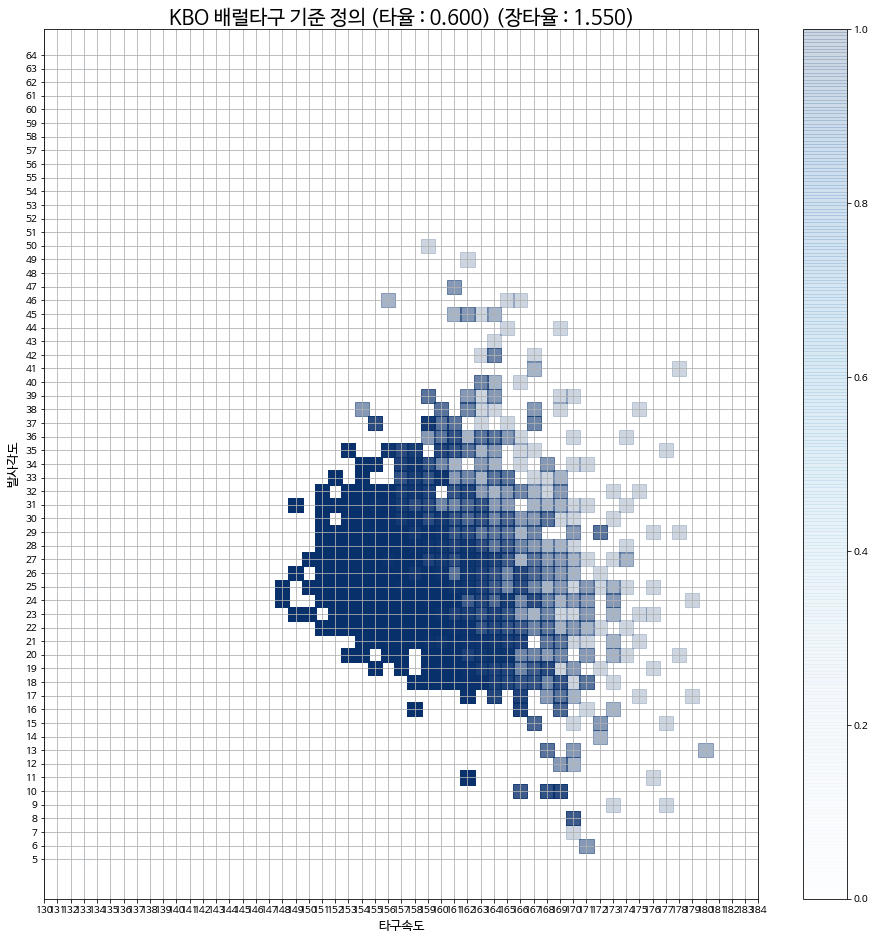

In [ ]:
plt.figure(figsize=(16,16))
plt.title("KBO 배럴타구 기준 정의 (타율 : 0.600) (장타율 : 1.550)", fontsize=20)
plt.scatter(barrel_zone_plus["타구속도_cut2"], barrel_zone_plus["발사각도_cut2"], 
            #color='skyblue',  
            alpha=.2, 
            cmap=plt.cm.Blues, 
            marker = 's',
            #s=df2.score2, #marker size
            s=200,
            c=barrel_zone_plus.배럴타구) #marker color
plt.xlabel("타구속도", fontsize=13)
plt.ylabel("발사각도", fontsize=13)
plt.xticks(range(130,185,1))
plt.yticks(range(5,65,1))
plt.grid()
plt.colorbar()
plt.savefig('/content/drive/MyDrive/빅콘테스트/빅콘테스트 배럴 기준/600_1550')
plt.show()

In [ ]:
len(barrel_zone) / len(df) * 100

4.531864673485445